# Notebook for kernel PCA development

In [3]:
import sys

repository_dp = '/home/giacomo/projects/ensemble_analysis/git/EnsembleTools'
sys.path.append(repository_dp)

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from dpet.analysis import EnsembleAnalysis
from dpet.logger import stream as st

# Load data

In [5]:
# Codes.
ens_codes = [
    "3a1g_B_prod_R1_fit",
    "3a1g_B_prod_R2_fit",
    "3a1g_B_prod_R3_fit"
]

# Instantiate the pipeline object.
pipeline = EnsembleAnalysis()

# Load some data.
data_dp = os.path.join(repository_dp, "ensemble_files", "3a1g_B")
pipeline.load_ensembles(
    input_dp=data_dp,
    codes=ens_codes,
    format="traj",
    topology_fp= os.path.join(data_dp, "3a1g_B.pdb"),  # Not needed when format="pdb".
    ext="xtc"
)

st.write("Loaded ensembles with the following codes:", pipeline.codes)

Loading data for 3a1g_B_prod_R1_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R2_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R3_fit.
Found 200 conformations.
Loaded ensembles with the following codes: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']


# Featurization

In [6]:
# Featurization options.
featurization = "tr_phi"
featurization_params = {"min_sep": 2, "max_sep": 0.25}

# featurization = "ca_dist"
# featurization_params = {"min_sep": 2, "max_sep": None}

pipeline.featurize(featurization=featurization,
                   params=featurization_params)

Featurizing the 3a1g_B_prod_R1_fit ensemble.
Featurized ensemble shape: (200, 612)
Featurizing the 3a1g_B_prod_R2_fit ensemble.
Featurized ensemble shape: (200, 612)
Featurizing the 3a1g_B_prod_R3_fit ensemble.
Featurized ensemble shape: (200, 612)


# Dimensionality reduction

In [7]:
reduce_dim_method = "kpca"
reduce_dim_params = {"circular": True}

reduce_dim = pipeline.dimensionality_reduction(
    method=reduce_dim_method,
    params=reduce_dim_params,
    # fit_on=["3a1g_B_prod_R1_fit"]  # Fit PCA only on the first ensemble.
)

Performing dimensionality reduction on tr_phi data.
Input featurized ensemble shape: (600, 612)
Fitting...
Transforming 3a1g_B_prod_R1_fit.
Reduced dimensionality ensemble shape: (200, 10)
Transforming 3a1g_B_prod_R2_fit.
Reduced dimensionality ensemble shape: (200, 10)
Transforming 3a1g_B_prod_R3_fit.
Reduced dimensionality ensemble shape: (200, 10)


# Visualization
**Note**: I used some old code for visualization and not Hamid's most recent functions. I will soon learn to use them and make the switch for new code i will be writing.

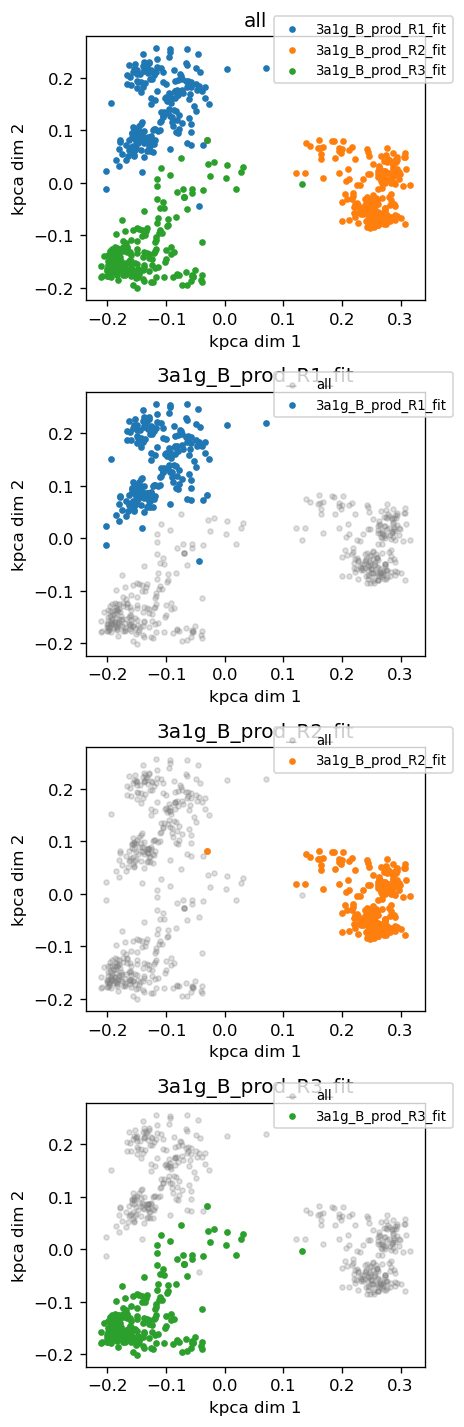

In [8]:
def set_labels(ax):
    ax.set_xlabel(f"{reduce_dim_method} dim {dim_x+1}")
    ax.set_ylabel(f"{reduce_dim_method} dim {dim_y+1}")

# 2d scatters.
dim_x = 0
dim_y = 1
marker = "."
legend_kwargs = {"loc": 'upper right',
                 "bbox_to_anchor": (1.1, 1.1),
                 "fontsize": 8}

# Plot all ensembles at the same time.
fig, ax = plt.subplots(len(ens_codes)+1, figsize=(4, 4*len(ens_codes)), dpi=120)
ax[0].set_title("all")
for code_i in pipeline.codes:
    ax[0].scatter(reduce_dim.data[code_i][:,dim_x],
                  reduce_dim.data[code_i][:,dim_y],
                  label=code_i, marker=marker)
ax[0].legend(**legend_kwargs)
set_labels(ax[0])

# Plot each ensembles.
for i, code_i in enumerate(pipeline.codes):
    ax[i+1].set_title(code_i)
    ax[i+1].scatter(reduce_dim.concat_data[:,dim_x],
                    reduce_dim.concat_data[:,dim_y],
                    label="all", color="gray", alpha=0.25,
                    marker=marker)
    ax[i+1].scatter(reduce_dim.data[code_i][:,dim_x],
                    reduce_dim.data[code_i][:,dim_y],
                    label=code_i, c=f"C{i}",
                    marker=marker)
    ax[i+1].legend(**legend_kwargs)
    set_labels(ax[i+1])

plt.tight_layout()
# plt.savefig(reduce_dim_params['tsne']['dir'] + 'PCA' + featurization+ ens_codes[0])
plt.show()
